# Lectura de registros de la base de datos MongoDB desde Python

El problema para leer los datos exportados como json desde MongoDB, es que no separa los registros. De modo que para que se puedan entender, tanto desde Python, como desde cualquier otro editor/lector de json, hay que meterlos dentro de una lista (incluirlos todos dentro de corchetes) y separar cada registro con una coma.

Eso es lo que hacemos con el script que sigue, abrimos el archivo como si fuera de texto plano, en el primer caracter de la primera linea le insertamos el '[' y en el utlimo caracter de la ultima fila le insertamos el ']'. A cada fila ademas le ponemos al final la coma para separar cada registro. 

Con esto ya podemos leer nuestro json como un diccionario de python y conociendo su estructura, ir obteniendo todos los valores que queramos!

Obviamente antes de hacer esto, hay que generar el json, es muy sencillo desde MongoChef, nos situamos en la coleccion que queramos exportar ("Landsat" en nuestro caso) y con el boton derecho elegimos "Export Collection". Dentro del dialogo de exportacion seleccionamos la opcion JSON-mongoexport. Elegimos el lugar en el que queremos guardar el archivo y le damos a exportar.

In [27]:
#Vamos a agregar los corchetes y las comas para que python entienda el archivo

f = open(r'path/to/the/file.json', 'r')
a = f.readlines()
h = []
for n, l in enumerate(a):
    if n == 0:
        l = '[' + l.rstrip() + ',\n'
        h.append(l)
    elif n == len(a)-1:
        l = l.rstrip() + ']\n'
        h.append(l)
    else:
        l = l.rstrip() + ',\n' 
        h.append(l)
f.close()

l8 = open(r'path/to/the/file.json', 'w')
for i in h:
    l8.write(i)
l8.close()

In [30]:
import json
ff = r'path/to/the/file.json'

In [156]:
#Ya tenemos el archivo listo para "parsearlo" desde Python

import json
from pprint import pprint #pprint nos imprime el json con los saltos de linea propios, como hacer .pretty() en MongoDB

with open(ff) as data_file:    
    
    data = json.load(data_file)

count = 0
for i in data:
    
    try:
        count +=1
        if count <=10:
            print i['_id'], i['Info']['Pasos']['rad']['Kl-Values'] #si solo queremos una banda seria cuestio de agregar ['b*']
            #pprint(i['Info']['Pasos']['nor']['Nor-Values']) #probar para ver ejemplo de pprint
        
    except: 
        count -= 1
        print 'Esta escena no completo el proceso de normalizacion hasta este paso'
        continue #Esto se hace por si hay escenas que no pudieron procesar y no tienen la clave que estamos pidiendo

20150706l7etm202_34 {u'b4': 12, u'b5': 5, u'b7': 5, u'b1': 43, u'b2': 29, u'b3': 20}
20140812l8oli202_34 {u'b4': 5762, u'b5': 4674, u'b6': 4203, u'b7': 4453, u'b1': 9125, u'b2': 8083, u'b3': 6664, u'b9': 4968}
20140828l8oli202_34 {u'b4': 6064, u'b5': 5176, u'b6': 4624, u'b7': 4681, u'b1': 8876, u'b2': 7974, u'b3': 6756, u'b9': 4971}
20151119l8oli202_34 {u'b4': 5651, u'b5': 4695, u'b6': 5009, u'b7': 5076, u'b1': 7666, u'b2': 6994, u'b3': 6102, u'b9': 4989}
20150119l8oli202_34 Esta escena no completo el proceso de normalizacion hasta este paso
20150228l7etm202_34 Esta escena no completo el proceso de normalizacion hasta este paso
20151205l8oli202_34 {u'b4': 5547, u'b5': 4970, u'b6': 4814, u'b7': 3806, u'b1': 7408, u'b2': 6812, u'b3': 6007, u'b9': 4966}
20151002l8oli202_34 {u'b4': 5801, u'b5': 4908, u'b6': 4492, u'b7': 4849, u'b1': 8342, u'b2': 7484, u'b3': 6423, u'b9': 4975}
20150831l8oli202_34 {u'b4': 6132, u'b5': 5507, u'b6': 5113, u'b7': 4916, u'b1': 9491, u'b2': 8635, u'b3': 7043, u'

### Ya podriamos empezar a jugar con los datos

In [50]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


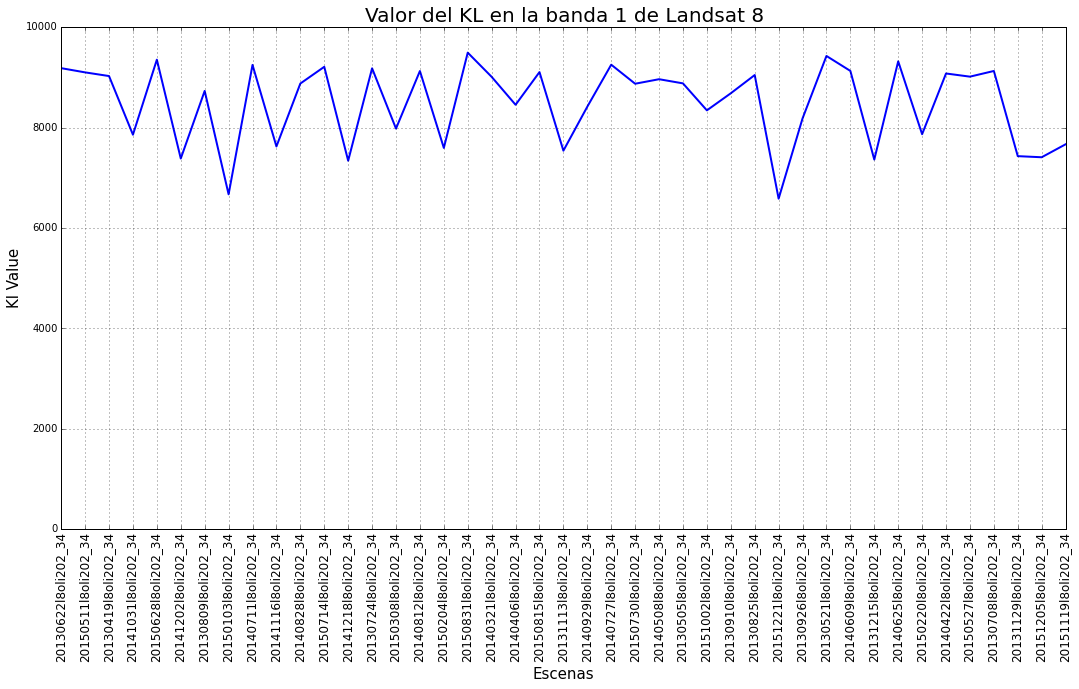

In [154]:
#Vamos a generar un grafico con los Kl de la banda 1 de Landsat 8

import json, operator
from pprint import pprint #pprint nos imprime el json con los saltos de linea propios, como hacer .pretty() en MongoDB

d_b1 = {}

with open(ff) as data_file:    
    
    data = json.load(data_file)
    
for i in data:
    
    if 'l8oli' in i['_id']:
        
        try:
            
            d_b1[i['_id']] = i['Info']['Pasos']['rad']['Kl-Values']['b1'] #hacemos un diccionario banda:valor_kl
            
        except: 
            
            continue 

sd_b1 = sorted(d_b1.items(), key=operator.itemgetter(0)) #ordenamos el diccionario por la escena
d = {}
for i, ii in sorted_x:
    d[i] = ii
plt.figure(figsize=(18,9))
plt.xlabel('Escenas', fontsize=15)
plt.ylabel('Kl Value', fontsize=15)
plt.xticks(range(len(d.values())), d.keys(), size='large', rotation='vertical')
plt.ylim(0, 10000)
plt.title('Valor del KL en la banda 1 de Landsat 8', fontsize=20)
plt.grid()
plt.plot(d.values(), c='blue', linewidth=2.0)

#  <font color='red'>Coming Soon: From MongoDB to SQLite (Tablas y SQL!)</font>